<a href="https://colab.research.google.com/github/Hildafibrianti/Clustering-Data-Mall-Customer/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING**


Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Here we model the clustering from customer income and spend data. We use this model to perform customer segmentation. We differentiate customers into the optimum number of groups based on their shared income and spend.

**Import Libraries and Raw Dataset**

In [1017]:
# Import Library
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

# Import Data to Google Colab
df_dcustomer = pd.read_csv ("https://raw.githubusercontent.com/Hildafibrianti/Clustering-Data-Mall-Customer/master/Mall_Customers.csv", sep = ",")
df_dcustomer

# Show 10 first Row
print (df_dcustomer.shape)
df_dcustomer.head ()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploring the data**

Eksplorasi data bertujuan untuk mengecek kualitas dari data dan distribusi variabelnya.
> 
Hal pertama yang dilakukan yaitu mengecek apakah terdapat missing value pada 
dataset, karena algoritma K-means tidak dapat menangani missing value pada data.


In [1018]:
# Check for Missing Values
df_dcustomer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Pada dataset ini tidak terdapat data yang kosong/ hilang. Selanjutnya kita cek apakah ada duplicated rows.

In [1019]:
# Check for Duplicated Rows
print(f"Duplicated rows: {df_dcustomer.duplicated().sum()}")

Duplicated rows: 0


Lalu, kita cek tipe data dari masing-masing atribut. Dataset ini terdiri atas tipe data numerik dan kategorikal. Atribut Gender termasuk dalam tipe data kategorikal, sedangkan untuk customerID, Age, Annual Income dan Spending Score termasuk dalam tipe data numerik.

In [1020]:
# Prints the Dataset Information
df_dcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [1021]:
df_copy = df_dcustomer.drop('CustomerID', axis=1)
df_copy

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Tipe data kategorikal tidak dapat diolah secara langsung, namun kita dapat mengconvert menjadi two binary variabel seperti halnya atribut Gender, nantinya Male dapat bernilai 0 atau 1 dan female pun dapat bernilai 0 atau 1.

In [1022]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_copy[['Gender']]))
df_encoded.columns = encoder.get_feature_names(['Gender'])

# Replace Categotical Data with Encoded Data
df_copy.drop(['Gender'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_copy, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


**Descriptive statistics and Distribution**

In [1023]:
# Prints Descriptive Statistics
df_copy.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [1024]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



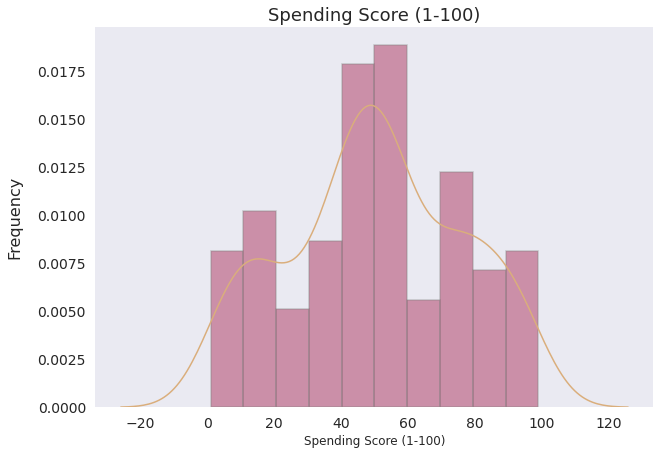

In [1025]:
spending = df_dcustomer["Spending Score (1-100)"]
graph_histo(spending)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



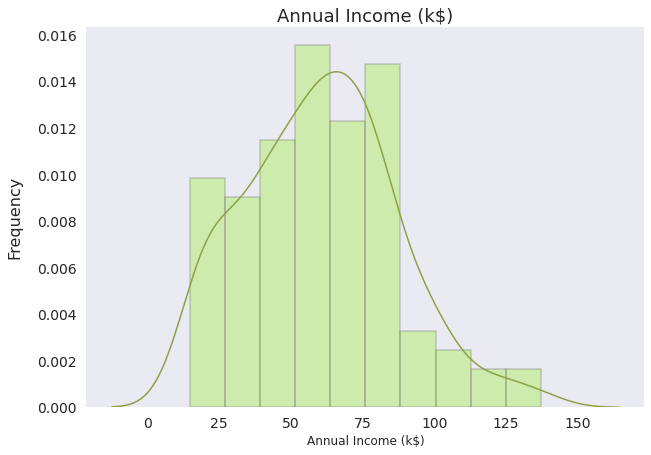

In [1026]:
income = df_dcustomer["Annual Income (k$)"]
graph_histo(income)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



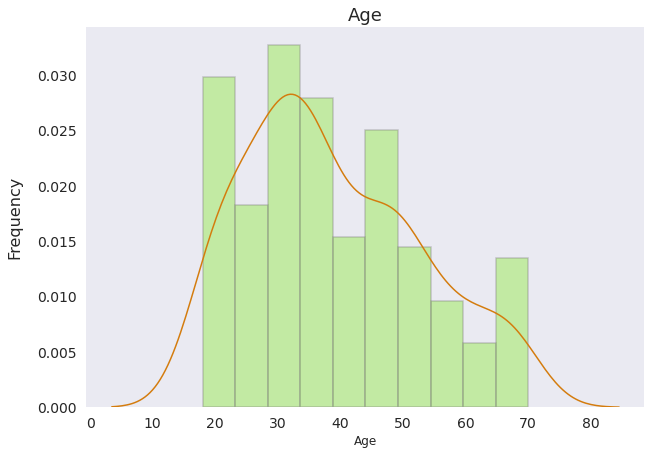

In [1027]:
age = df_dcustomer["Age"]
graph_histo(age)

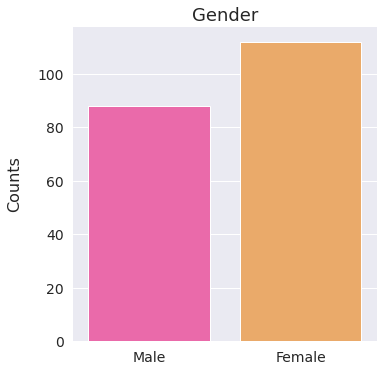

In [1028]:
gender = df_dcustomer["Gender"]
graph_histo(gender)

Correlation between parameters
> 
Kita akan menganalisis korelasi antara parameter numerik. Dan untuk melihat perbedaan gender maka kita set dengan dua warna yang berbeda.





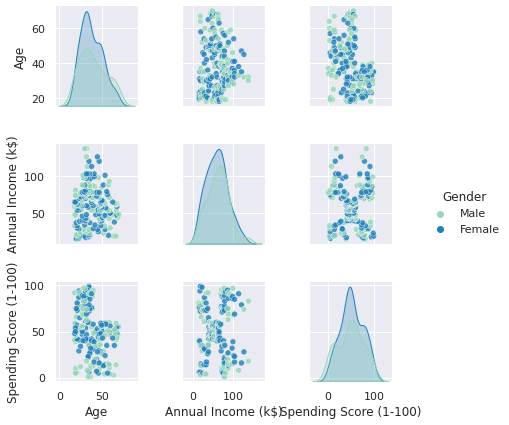

In [1029]:
sns.pairplot(df_dcustomer, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

**Data Preprocessing**

First, we standardize the data to equalize the range and/or data variability. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.

In [1030]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_encoded.columns.tolist()
df_encoded[column_names] = scaler.fit_transform(df_encoded[column_names])
df_encoded.sort_index(inplace=True)
df_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


Text(0, 0.5, 'Annual Spend')

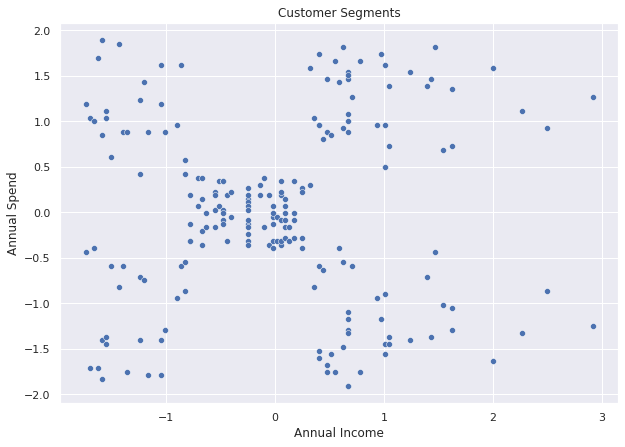

In [1031]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (10, 7)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

# **K-Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

**Search for the Optimum Number of Clusters (k)**

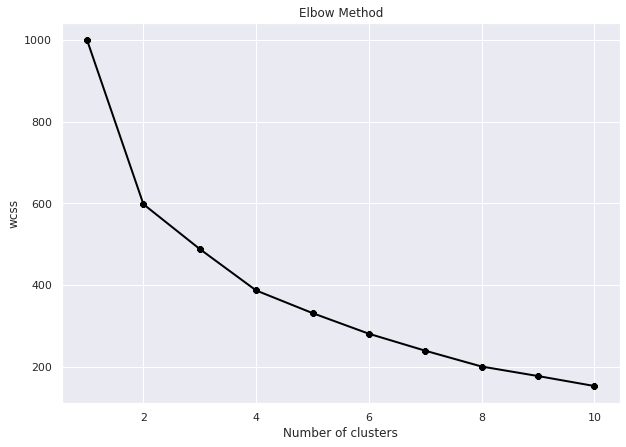

In [1032]:
# Transform Data Frame to Numpy Array
income = df_encoded.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss, linewidth=2, color="black", marker ="8")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

**Modeling K-Means**

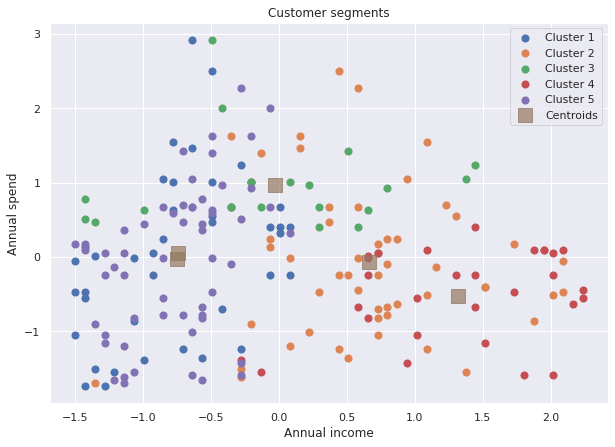

In [1033]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=5
#sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [1034]:
# Add Cluster Information to the Raw Data
df_encoded['cluster'] = cluster
df_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,0
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,0
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,1
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,4
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,4
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405,4
196,0.441365,2.497807,-0.861839,0.886405,-0.886405,1
197,-0.491602,2.497807,0.923953,-1.128152,1.128152,0
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152,2


**Hierarchical Clustering**

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

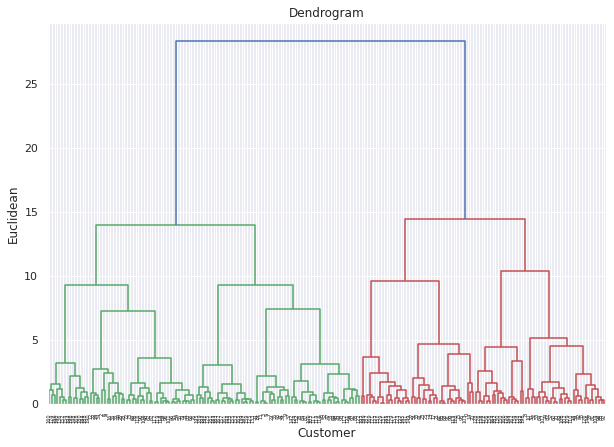

In [1035]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

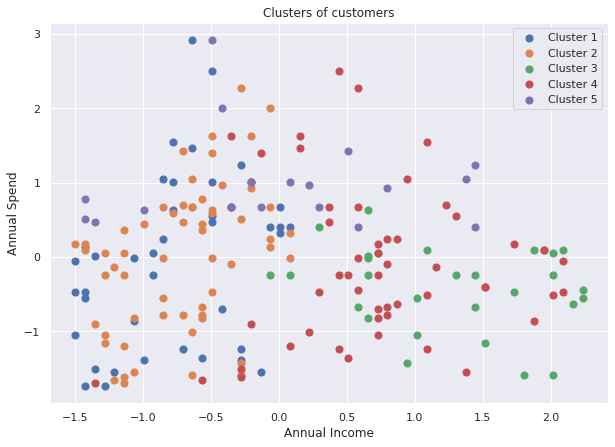

In [1036]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=5
#sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[hcluster == 3, 0], income[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[hcluster == 4, 0], income[hcluster == 4, 1], s = 50, label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()